In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import plotly.offline as py
import csv
import holidays

In [2]:
def predGoldPrice(df):
    X_train = df.iloc[:]
    X_train.tail()
    
    holiday = pd.DataFrame([])
    for date, name in sorted(holidays.UnitedStates(years=[2015,2016,2017,2018,2019,2020,2021]).items()):
        holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
    holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
    model = Prophet(daily_seasonality = True, 
                holidays = holiday, 
                seasonality_mode = ('additive'), 
                changepoint_prior_scale = 0.5, 
                n_changepoints = 100, 
                holidays_prior_scale = 0.5
               )
    
    model.fit(X_train, algorithm='Newton')
    future = model.make_future_dataframe(periods=30, freq = "D")
    forecast = model.predict(future)
    forecast.tail(10)
    fig1 = model.plot(forecast)
    forecast.to_csv('output_file_sept.csv')
    fig = model.plot_components(forecast)
    list(forecast)

In [3]:
df = pd.read_csv('gold_data_sept.csv')
df.columns=['ds','y']

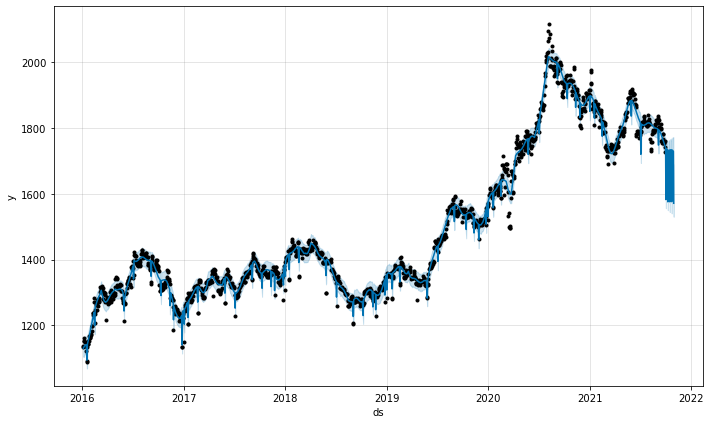

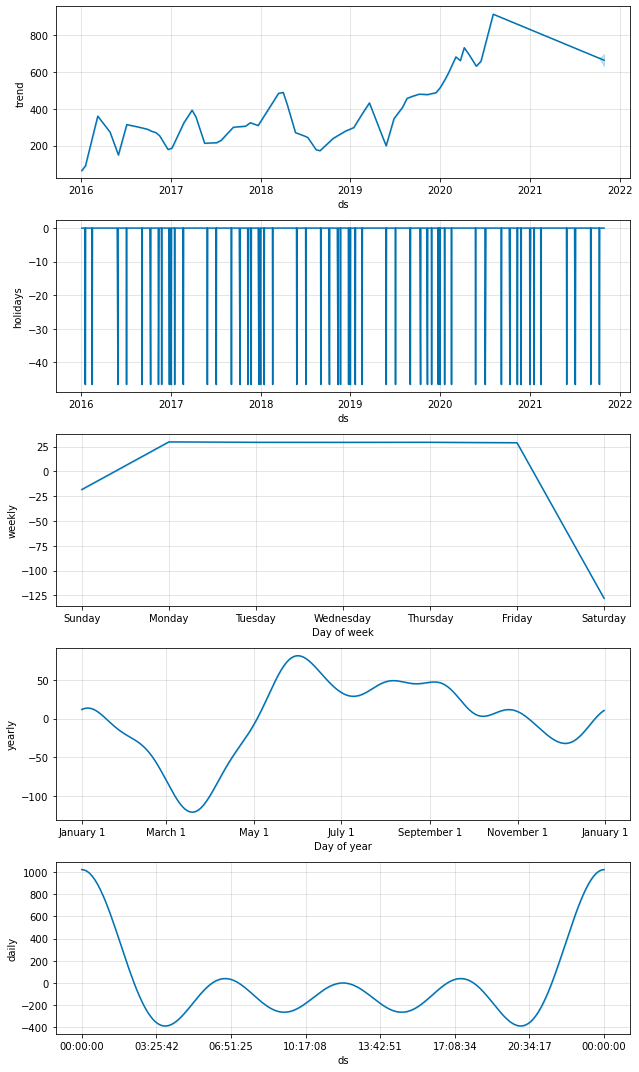

In [4]:
predGoldPrice(df)

In [90]:
#reading the output dataset
df_output = pd.read_csv('output_file_sept.csv')
df_output.tail(5)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1547,1547,2021-10-26,667.611374,1690.365830,1771.182548,642.195330,692.813777,0.0,0.0,0.0,...,29.255639,29.255639,29.255639,11.569380,11.569380,11.569380,0.0,0.0,0.0,1731.852798
1548,1548,2021-10-27,667.056304,1693.909880,1770.828210,639.533648,694.684414,0.0,0.0,0.0,...,29.225248,29.225248,29.225248,11.453260,11.453260,11.453260,0.0,0.0,0.0,1731.151217
1549,1549,2021-10-28,666.501234,1690.985896,1772.118386,637.184464,696.047750,0.0,0.0,0.0,...,29.286705,29.286705,29.286705,11.202312,11.202312,11.202312,0.0,0.0,0.0,1730.406656
1550,1550,2021-10-29,665.946164,1689.293830,1772.141945,634.881451,697.703560,0.0,0.0,0.0,...,28.836892,28.836892,28.836892,10.815894,10.815894,10.815894,0.0,0.0,0.0,1729.015355
1551,1551,2021-10-30,665.391093,1530.247867,1615.818903,632.474964,699.304365,0.0,0.0,0.0,...,-127.920844,-127.920844,-127.920844,10.295236,10.295236,10.295236,0.0,0.0,0.0,1571.181890


In [36]:
#assigning the output variable to array
output_yhat=df_output.iloc[:,-1:].values
output_yhat

array([[1130.24279385],
       [1131.88849492],
       [1133.68846975],
       ...,
       [1730.40665582],
       [1729.01535506],
       [1571.18189037]])

In [50]:
#assigning the actual variable to array
output_actual=df.iloc[:,-1:].values
output_actual

array([[1135.5],
       [1138.4],
       [1151.9],
       ...,
       [1741.1],
       [1726.3],
       [1759.7]])

In [91]:
#Calculating Percent Error
i = 0
output_percent_error = []
while i < len(output_actual):
    output_percent_error.append(100-(1*((output_yhat[i]*100)/output_actual[i])))
    i += 1
output_percent_error

[array([0.46298601]),
 array([0.57198745]),
 array([1.58099924]),
 array([2.35115025]),
 array([1.3357941]),
 array([0.7244052]),
 array([-0.29407685]),
 array([-0.31095233]),
 array([-1.63790962]),
 array([-0.32796062]),
 array([-0.37361221]),
 array([-0.68055451]),
 array([-0.55417806]),
 array([0.51649476]),
 array([-0.51615275]),
 array([-0.88918141]),
 array([-1.08721345]),
 array([-0.09514229]),
 array([-0.7241803]),
 array([-1.0915655]),
 array([-1.56025251]),
 array([-1.69777497]),
 array([-2.32458491]),
 array([-1.5449135]),
 array([-0.6906101]),
 array([-0.98958038]),
 array([1.18214139]),
 array([0.7710229]),
 array([0.09173895]),
 array([3.62814458]),
 array([2.52598396]),
 array([2.76576105]),
 array([0.29497208]),
 array([-1.05054816]),
 array([-0.81982089]),
 array([0.14601172]),
 array([0.32908324]),
 array([-2.04963761]),
 array([-1.02346662]),
 array([0.03747105]),
 array([-0.15008018]),
 array([-1.73232263]),
 array([-1.11199546]),
 array([-1.40016783]),
 array([-0.6

In [9]:
#Calculating the Difference between actual and predicted
i = 0
output_difference = []
while i < len(output_actual):
    output_difference.append(output_actual[i] - output_yhat[i])
    i += 1
output_difference 

[array([5.25720615]),
 array([6.51150508]),
 array([18.21153025]),
 array([27.33682392]),
 array([15.38434061]),
 array([8.31979372]),
 array([-3.34394791]),
 array([-3.53677185]),
 array([-18.39372507]),
 array([-3.73055208]),
 array([-4.07349392]),
 array([-7.40783581]),
 array([-6.29435438]),
 array([5.94847019]),
 array([-5.9027229]),
 array([-10.15978684]),
 array([-12.52904779]),
 array([-1.11059594]),
 array([-8.42873455]),
 array([-12.70254776]),
 array([-18.12857392]),
 array([-19.92338926]),
 array([-27.19996798]),
 array([-18.28096149]),
 array([-8.27143714]),
 array([-11.85517298]),
 array([14.63727471]),
 array([9.53678229]),
 array([1.1307743]),
 array([46.51644168]),
 array([32.11030807]),
 array([34.11842832]),
 array([3.56355767]),
 array([-13.03835324]),
 array([-10.22480616]),
 array([1.84339799]),
 array([4.17080101]),
 array([-25.55283206]),
 array([-12.910008]),
 array([0.47854273]),
 array([-1.91652392]),
 array([-21.8064773]),
 array([-14.15903821]),
 array([-17

In [10]:
#Calculating the Integrated error
i = 0
output_integrated = []
while i < len(output_percent_error):
    output_integrated.append(((output_yhat[i]*output_percent_error[i])/100)+output_yhat[i])
    i += 1
output_integrated

[array([1135.47565987]),
 array([1138.36275501]),
 array([1151.61207585]),
 array([1162.0572702]),
 array([1151.49449689]),
 array([1148.43973098]),
 array([1137.09016622]),
 array([1137.38900233]),
 array([1122.69872741]),
 array([1137.48776526]),
 array([1090.28478093]),
 array([1088.44958564]),
 array([1135.76511807]),
 array([1151.66927646]),
 array([1143.56953293]),
 array([1142.50966106]),
 array([1152.26378251]),
 array([1167.29894335]),
 array([1163.83896076]),
 array([1163.56134337]),
 array([1161.61714847]),
 array([1173.16174568]),
 array([1169.46771365]),
 array([1183.01757496]),
 array([1197.64287662]),
 array([1197.88268353]),
 array([1238.02696672]),
 array([1236.82646922]),
 array([1232.59896264]),
 array([1280.41231624]),
 array([1270.38889877]),
 array([1232.6563658]),
 array([1208.0894885]),
 array([1240.96302582]),
 array([1247.1161749]),
 array([1262.49730842]),
 array([1267.38627459]),
 array([1246.17625954]),
 array([1261.26787038]),
 array([1277.09982069]),
 arr

In [63]:
#Assigning the percent error for 45 days
re_output_yhat=output_yhat[-30:]
re_output_yhat = pd.DataFrame(re_output_yhat).values
re_output_yhat 
#= re_output_yhat.to_numpy()

array([[1740.73433001],
       [1582.28020383],
       [1690.34737004],
       [1737.03388537],
       [1735.50032731],
       [1734.52866623],
       [1733.82951312],
       [1732.79034055],
       [1575.60235119],
       [1684.89299172],
       [1686.19297518],
       [1732.28651627],
       [1732.29694543],
       [1732.46783933],
       [1732.17467608],
       [1575.5992356 ],
       [1685.36222372],
       [1733.53770133],
       [1733.2665069 ],
       [1733.31539096],
       [1733.38442002],
       [1732.85524727],
       [1575.91792638],
       [1685.20327119],
       [1732.79699103],
       [1731.85279846],
       [1731.15121712],
       [1730.40665582],
       [1729.01535506],
       [1571.18189037]])

In [92]:
#Assigning the below 45 days ds
#pred_df=df.iloc[-47:-2,0]
pred_df = pd.DataFrame(df.iloc[-47:-2,0])
pred_df.tail(5)

,ds
1515,22-Sep-21
1516,23-Sep-21
1517,24-Sep-21
1518,27-Sep-21
1519,28-Sep-21


In [68]:
#Assigning the percent error for 45 days
pred_percent_error=output_percent_error[-47:-2]
pred_percent_error = pd.DataFrame(pred_percent_error)
pred_percent_error.head(5)

,0
0,1.322013
1,0.324539
2,0.549060
3,0.142830
4,0.176240


In [93]:
#Combining the 45 days data
df_combined = pred_df.copy()
df_combined['y'] = pred_percent_error.values
df_combined.tail(5)
#type(pred_percent_error)

,ds,y
1515,22-Sep-21,1.117552
1516,23-Sep-21,-0.381444
1517,24-Sep-21,-0.086681
1518,27-Sep-21,0.316840
1519,28-Sep-21,-0.355174


In [17]:
def predError(df):
    X_train = df.iloc[:]
    X_train.tail()
    
    holiday = pd.DataFrame([])
    for date, name in sorted(holidays.UnitedStates(years=[2015,2016,2017,2018,2019,2020,2021]).items()):
        holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
    holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
    model = Prophet(daily_seasonality = True, 
                holidays = holiday, 
                seasonality_mode = ('additive'), 
                changepoint_prior_scale = 0.5, 
                n_changepoints = 100, 
                holidays_prior_scale = 0.5
               )
    
    model.fit(X_train, algorithm='Newton')
    future = model.make_future_dataframe(periods=30, freq = "D")
    forecast_new = model.predict(future)
    forecast_new.tail(10)
    fig1 = model.plot(forecast_new)
    forecast_new.to_csv('output_file_sept_new.csv')
    fig = model.plot_components(forecast_new)
    list(forecast_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 35.


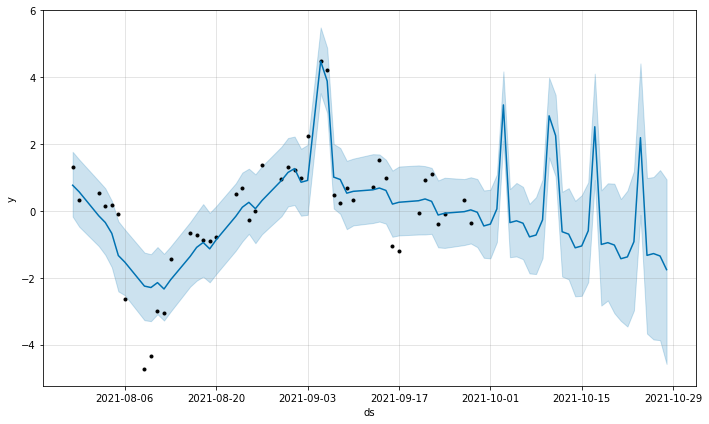

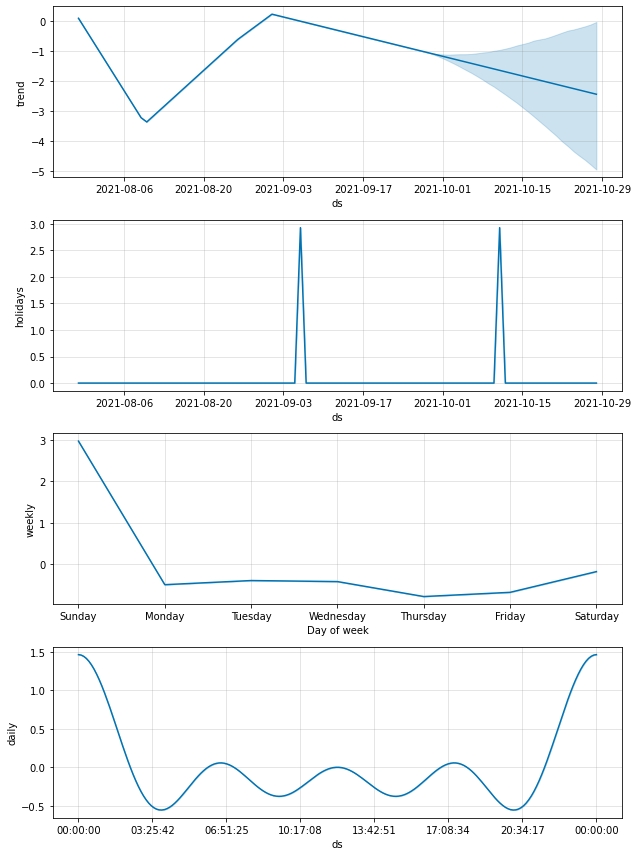

In [25]:
#Prediciting the 45 days record keeping percent error as output
predError(df_combined)

In [94]:
#Reading the generated dataset
df_error = pd.read_csv('output_file_sept_new.csv')
df_error.tail(5)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,US-Holidays,US-Holidays_lower,US-Holidays_upper,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,70,2021-10-24,-2.247745,-0.120603,4.412306,-4.334676,-0.281945,0.0,0.0,0.0,...,0.0,0.0,0.0,2.975886,2.975886,2.975886,0.0,0.0,0.0,2.191789
71,71,2021-10-25,-2.294443,-3.669817,0.983838,-4.481350,-0.229756,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.499059,-0.499059,-0.499059,0.0,0.0,0.0,-1.329854
72,72,2021-10-26,-2.341142,-3.846997,1.014025,-4.618487,-0.176679,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.399006,-0.399006,-0.399006,0.0,0.0,0.0,-1.276500
73,73,2021-10-27,-2.387840,-3.867015,1.221925,-4.775505,-0.113782,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.424019,-0.424019,-0.424019,0.0,0.0,0.0,-1.348211
74,74,2021-10-28,-2.434539,-4.578615,0.942599,-4.939129,-0.030362,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.786285,-0.786285,-0.786285,0.0,0.0,0.0,-1.757176


In [95]:
#assigning the output variable to array
re_output_ds=df_error.iloc[:,1].values
re_output_ds=pd.DataFrame(re_output_ds[-30:])
re_output_ds.columns = ['ds']
re_output_ds.tail(5)


,ds
25,2021-10-24
26,2021-10-25
27,2021-10-26
28,2021-10-27
29,2021-10-28


In [58]:
#assigning the output variable to array
re_output_error_percent=df_error.iloc[:,-1:].values
re_output_error_percent=re_output_error_percent[-30:]
len(re_output_error_percent)
#re_output_yhat = pd.DataFrame(re_output_yhat)

array([1740.73433001, 1582.28020383, 1690.34737004, 1737.03388537,
       1735.50032731, 1734.52866623, 1733.82951312, 1732.79034055,
       1575.60235119, 1684.89299172, 1686.19297518, 1732.28651627,
       1732.29694543, 1732.46783933, 1732.17467608, 1575.5992356 ,
       1685.36222372, 1733.53770133, 1733.2665069 , 1733.31539096,
       1733.38442002, 1732.85524727, 1575.91792638, 1685.20327119,
       1732.79699103, 1731.85279846, 1731.15121712, 1730.40665582,
       1729.01535506, 1571.18189037])

In [65]:
#Calculating output actual values
i = 0
re_output_actual = []
while i < len(re_output_error_percent):
    num = -(re_output_yhat[i]*100)
    den = re_output_error_percent[i]-100    
    re_output_actual.append(num/den)
    i += 1
re_output_actual

[array([1740.02696234]),
 array([1575.1978432]),
 array([1683.7035859]),
 array([1738.08219894]),
 array([1792.36226398]),
 array([1728.49301748]),
 array([1728.71543652]),
 array([1726.44492536]),
 array([1563.46196248]),
 array([1672.82385103]),
 array([1681.70995316]),
 array([1783.02367099]),
 array([1772.19828746]),
 array([1721.74617073]),
 array([1720.22885825]),
 array([1558.40386315]),
 array([1667.87666075]),
 array([1723.31045991]),
 array([1778.04986849]),
 array([1716.10347696]),
 array([1717.07886341]),
 array([1715.33615041]),
 array([1553.69563483]),
 array([1662.34171285]),
 array([1716.99455557]),
 array([1770.66197278]),
 array([1708.43156452]),
 array([1708.59642521]),
 array([1706.01467579]),
 array([1544.05021625])]

In [66]:
#Calculating Output Difference
i = 0
re_output_difference = []
while i < len(re_output_actual):       
    re_output_difference.append(re_output_actual[i]-re_output_yhat[i])
    i += 1
re_output_difference

[array([-0.70736767]),
 array([-7.08236063]),
 array([-6.64378414]),
 array([1.04831357]),
 array([56.86193667]),
 array([-6.03564875]),
 array([-5.1140766]),
 array([-6.34541519]),
 array([-12.14038872]),
 array([-12.06914069]),
 array([-4.48302202]),
 array([50.73715472]),
 array([39.90134203]),
 array([-10.72166859]),
 array([-11.94581783]),
 array([-17.19537245]),
 array([-17.48556297]),
 array([-10.22724141]),
 array([44.78336159]),
 array([-17.211914]),
 array([-16.30555661]),
 array([-17.51909687]),
 array([-22.22229155]),
 array([-22.86155834]),
 array([-15.80243545]),
 array([38.80917432]),
 array([-22.7196526]),
 array([-21.81023061]),
 array([-23.00067927]),
 array([-27.13167412])]

In [67]:
#Calculating the Output Integrated error
i = 0
re_output_integrated = []
while i < len(re_output_yhat):
    re_output_integrated.append(((re_output_yhat[i]*re_output_error_percent[i])/100)+re_output_yhat[i])
    i += 1
re_output_integrated

[array([1740.02667477]),
 array([1575.16599969]),
 array([1683.67736996]),
 array([1738.08156665]),
 array([1790.55834303]),
 array([1728.47194187]),
 array([1728.7003075]),
 array([1726.42160327]),
 array([1563.36769153]),
 array([1672.73677422]),
 array([1681.69800253]),
 array([1781.57991064]),
 array([1771.29990204]),
 array([1721.67940469]),
 array([1720.14590268]),
 array([1558.21413002]),
 array([1667.69334689]),
 array([1723.24976483]),
 array([1776.92191954]),
 array([1715.93084752]),
 array([1716.92402418]),
 array([1715.15722411]),
 array([1553.3777925]),
 array([1662.02730646]),
 array([1716.84911716]),
 array([1769.81135757]),
 array([1708.12942622]),
 array([1708.31801765]),
 array([1705.70457808]),
 array([1543.57346509])]

In [86]:
df_final = re_output_ds.copy()

#Actual Values
re_output_actual = pd.DataFrame(re_output_actual)
df_final['Actual'] = re_output_actual.values

#Predicted values
re_output_yhat = pd.DataFrame(re_output_yhat)
df_final['yhat'] = re_output_yhat.values

#Difference Values
re_output_difference = pd.DataFrame(re_output_difference)
df_final['Difference'] = re_output_difference.values

#%Error Values
re_output_error_percent = pd.DataFrame(re_output_error_percent)
df_final['%age Prediction'] = re_output_error_percent.values

#%Integration Values
re_output_integrated = pd.DataFrame(re_output_integrated)
df_final['%age Integration'] = re_output_integrated.values

df_final

,ds,Actual,yhat,Difference,%age Prediction,%age Integration
0,2021-09-29,1740.026962,1740.734330,-0.707368,-0.040653,1740.026675
1,2021-09-30,1575.197843,1582.280204,-7.082361,-0.449617,1575.166000
2,2021-10-01,1683.703586,1690.347370,-6.643784,-0.394593,1683.677370
3,2021-10-02,1738.082199,1737.033885,1.048314,0.060314,1738.081567
4,2021-10-03,1792.362264,1735.500327,56.861937,3.172458,1790.558343
5,2021-10-04,1728.493017,1734.528666,-6.035649,-0.349186,1728.471942
6,2021-10-05,1728.715437,1733.829513,-5.114077,-0.295831,1728.700307
7,2021-10-06,1726.444925,1732.790341,-6.345415,-0.367542,1726.421603
8,2021-10-07,1563.461962,1575.602351,-12.140389,-0.776507,1563.367692
9,2021-10-08,1672.823851,1684.892992,-12.069141,-0.721483,1672.736774


In [87]:
#Generating final csv
df_final.to_csv('final_predicted.csv')